# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

chunks=[cities[x:x+100] for x in range(0, len(cities), 10)]

len(chunks)

63

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city_name=[]
lat   = []
temp  = []
hum   = []
cloud = []
wind  = []


print("Beginning Data Retrieval")
print("-----------------------------")
i=1
for i in range(len(chunks)):
    for count,city in enumerate(chunks[i]):
        query_url = url + "appid=" + api_key + "&q=" + city
    
        #print(query_url)
    
        weather_response = requests.get(query_url).json()
        try:
            print("Processing Record {} of Set {} | {}".format(count+1,i+1,weather_response["name"]))
            city_name.append(weather_response["name"])
            lat.append(weather_response["coord"]['lat'])
            temp.append(weather_response["main"]['temp'])
            hum.append(weather_response["main"]['humidity'])
            cloud.append(weather_response["clouds"]['all'])
            wind.append(weather_response["wind"]['speed'])
            
        except KeyError:
            print("City not found",city)
print("-----------------------------")            
print("End of data processing")    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Kodiak
Processing Record 2 of Set 1 | Biltine
Processing Record 3 of Set 1 | Atuona
Processing Record 4 of Set 1 | Alpena
Processing Record 5 of Set 1 | Nouadhibou
Processing Record 6 of Set 1 | Lagoa
Processing Record 7 of Set 1 | Mataura
Processing Record 8 of Set 1 | Saint-Philippe
Processing Record 9 of Set 1 | Ushuaia
Processing Record 10 of Set 1 | Dikson
Processing Record 11 of Set 1 | Hithadhoo
Processing Record 12 of Set 1 | Vaini
Processing Record 13 of Set 1 | Qaanaaq
Processing Record 14 of Set 1 | Tecoanapa
Processing Record 15 of Set 1 | Tuktoyaktuk
Processing Record 16 of Set 1 | Fortuna
Processing Record 17 of Set 1 | Punta Arenas
Processing Record 18 of Set 1 | Torbay
Processing Record 19 of Set 1 | Pando
Processing Record 20 of Set 1 | Zabid
Processing Record 21 of Set 1 | San Patricio
Processing Record 22 of Set 1 | Makakilo City
Processing Record 23 of Set 1 | Ostrovnoy
Processing 

Processing Record 6 of Set 3 | Hervey Bay
Processing Record 7 of Set 3 | Vila Velha
Processing Record 8 of Set 3 | Bethel
Processing Record 9 of Set 3 | Poum
Processing Record 10 of Set 3 | Andros Town
Processing Record 11 of Set 3 | Dingle
Processing Record 12 of Set 3 | Dzilam Gonzalez
Processing Record 13 of Set 3 | Ponta do Sol
Processing Record 14 of Set 3 | Rafsanjan
Processing Record 15 of Set 3 | Tasiilaq
Processing Record 16 of Set 3 | Kamenka
Processing Record 17 of Set 3 | Saint Anthony
Processing Record 18 of Set 3 | Buchanan
Processing Record 19 of Set 3 | Mocuba
City not found nizhneyansk
Processing Record 21 of Set 3 | Hofn
Processing Record 22 of Set 3 | Port Alfred
Processing Record 23 of Set 3 | Hobart
Processing Record 24 of Set 3 | Busselton
Processing Record 25 of Set 3 | Kovur
Processing Record 26 of Set 3 | Dhuburi
Processing Record 27 of Set 3 | Provideniya
Processing Record 28 of Set 3 | Port Hedland
Processing Record 29 of Set 3 | Isiro
Processing Record 30 of

Processing Record 14 of Set 5 | Avarua
Processing Record 15 of Set 5 | Kirsanov
Processing Record 16 of Set 5 | Lyskovo
Processing Record 17 of Set 5 | Darhan
Processing Record 18 of Set 5 | Port Lincoln
Processing Record 19 of Set 5 | Nadbai
Processing Record 20 of Set 5 | Arraial do Cabo
Processing Record 21 of Set 5 | Mahebourg
Processing Record 22 of Set 5 | Ancud
Processing Record 23 of Set 5 | Mar del Plata
Processing Record 24 of Set 5 | Jamestown
Processing Record 25 of Set 5 | Pine Bluff
Processing Record 26 of Set 5 | Saskylakh
City not found illoqqortoormiut
Processing Record 28 of Set 5 | Carutapera
Processing Record 29 of Set 5 | Concepcion del Oro
Processing Record 30 of Set 5 | Ornskoldsvik
Processing Record 31 of Set 5 | Duvan
Processing Record 32 of Set 5 | Khatanga
Processing Record 33 of Set 5 | Kamina
Processing Record 34 of Set 5 | Koslan
Processing Record 35 of Set 5 | Butaritari
City not found belushya guba
Processing Record 37 of Set 5 | Ust-Uda
Processing Recor

Processing Record 21 of Set 7 | Fort Nelson
Processing Record 22 of Set 7 | Zlitan
Processing Record 23 of Set 7 | Nioro
City not found golden rock
Processing Record 25 of Set 7 | Yellowknife
Processing Record 26 of Set 7 | North Platte
Processing Record 27 of Set 7 | Kanye
Processing Record 28 of Set 7 | East London
Processing Record 29 of Set 7 | Ribeira Grande
Processing Record 30 of Set 7 | Esperance
Processing Record 31 of Set 7 | Broome
Processing Record 32 of Set 7 | Tuatapere
Processing Record 33 of Set 7 | Pevek
Processing Record 34 of Set 7 | Hasaki
Processing Record 35 of Set 7 | Uyskoye
Processing Record 36 of Set 7 | Pangnirtung
Processing Record 37 of Set 7 | Marrakesh
Processing Record 38 of Set 7 | Carnarvon
Processing Record 39 of Set 7 | Rikitea
Processing Record 40 of Set 7 | Bluff
Processing Record 41 of Set 7 | Cherskiy
City not found taolanaro
Processing Record 43 of Set 7 | Waingapu
Processing Record 44 of Set 7 | Healdsburg
Processing Record 45 of Set 7 | Nikols

Processing Record 32 of Set 9 | Verkhoyansk
Processing Record 33 of Set 9 | Mangrol
Processing Record 34 of Set 9 | Nanortalik
Processing Record 35 of Set 9 | Kavieng
Processing Record 36 of Set 9 | Katiola
Processing Record 37 of Set 9 | Chuy
Processing Record 38 of Set 9 | Karratha
Processing Record 39 of Set 9 | Victoria
Processing Record 40 of Set 9 | Tiksi
Processing Record 41 of Set 9 | Lebu
Processing Record 42 of Set 9 | Milkovo
Processing Record 43 of Set 9 | Khandyga
Processing Record 44 of Set 9 | Kalmunai
Processing Record 45 of Set 9 | Ixtapa
Processing Record 46 of Set 9 | Lata
Processing Record 47 of Set 9 | Hermanus
Processing Record 48 of Set 9 | Cape Town
Processing Record 49 of Set 9 | Cuxhaven
Processing Record 50 of Set 9 | Barrow
Processing Record 51 of Set 9 | Sioux Lookout
Processing Record 52 of Set 9 | Georgetown
Processing Record 53 of Set 9 | Ewa Beach
Processing Record 54 of Set 9 | Bambous Virieux
Processing Record 55 of Set 9 | Geraldton
City not found mu

City not found asfi
Processing Record 39 of Set 11 | Lima
Processing Record 40 of Set 11 | Ketchikan
Processing Record 41 of Set 11 | Wahiawa
Processing Record 42 of Set 11 | Auki
Processing Record 43 of Set 11 | Marsa Matruh
Processing Record 44 of Set 11 | Coahuayana
City not found gorno-chuyskiy
Processing Record 46 of Set 11 | Port Blair
Processing Record 47 of Set 11 | Hovd
Processing Record 48 of Set 11 | Padang
Processing Record 49 of Set 11 | Port Elizabeth
Processing Record 50 of Set 11 | New Norfolk
Processing Record 51 of Set 11 | Sanchez
Processing Record 52 of Set 11 | Bathsheba
City not found samusu
Processing Record 54 of Set 11 | Piacabucu
Processing Record 55 of Set 11 | Yasnyy
Processing Record 56 of Set 11 | Ilulissat
City not found yei
Processing Record 58 of Set 11 | Roald
Processing Record 59 of Set 11 | Kahului
Processing Record 60 of Set 11 | Richards Bay
Processing Record 61 of Set 11 | Mitsamiouli
Processing Record 62 of Set 11 | College
Processing Record 63 o

Processing Record 49 of Set 13 | Talnakh
Processing Record 50 of Set 13 | Camacha
Processing Record 51 of Set 13 | Airai
Processing Record 52 of Set 13 | Cidreira
Processing Record 53 of Set 13 | Grindavik
Processing Record 54 of Set 13 | Faanui
Processing Record 55 of Set 13 | Kant
City not found attawapiskat
Processing Record 57 of Set 13 | Baykit
Processing Record 58 of Set 13 | Melilla
Processing Record 59 of Set 13 | Taybad
Processing Record 60 of Set 13 | Lianzhou
Processing Record 61 of Set 13 | Martapura
Processing Record 62 of Set 13 | Morondava
Processing Record 63 of Set 13 | Tezu
Processing Record 64 of Set 13 | Kaitangata
City not found kuche
Processing Record 66 of Set 13 | Kaniama
Processing Record 67 of Set 13 | Svetlogorsk
Processing Record 68 of Set 13 | Cayenne
City not found kapoeta
Processing Record 70 of Set 13 | Aranos
Processing Record 71 of Set 13 | Kampong Thum
Processing Record 72 of Set 13 | Beloha
Processing Record 73 of Set 13 | Leningradskiy
Processing Re

Processing Record 58 of Set 15 | Keskin
Processing Record 59 of Set 15 | Pitimbu
Processing Record 60 of Set 15 | Husavik
City not found sakakah
City not found palabuhanratu
Processing Record 63 of Set 15 | Nhulunbuy
Processing Record 64 of Set 15 | Labuhan
Processing Record 65 of Set 15 | Acari
Processing Record 66 of Set 15 | Codrington
Processing Record 67 of Set 15 | Qiyang
City not found preobrazhenskaya
Processing Record 69 of Set 15 | Cadiz
Processing Record 70 of Set 15 | Rosetta
Processing Record 71 of Set 15 | Norman Wells
Processing Record 72 of Set 15 | Port Macquarie
Processing Record 73 of Set 15 | Byron Bay
Processing Record 74 of Set 15 | Antofagasta
Processing Record 75 of Set 15 | Viedma
Processing Record 76 of Set 15 | Lavrentiya
Processing Record 77 of Set 15 | Flinders
Processing Record 78 of Set 15 | Torrington
Processing Record 79 of Set 15 | Mayo
Processing Record 80 of Set 15 | Zhezkazgan
Processing Record 81 of Set 15 | Elizabeth City
Processing Record 82 of S

Processing Record 65 of Set 17 | Sambava
Processing Record 66 of Set 17 | Pisco
Processing Record 67 of Set 17 | Biskamzha
Processing Record 68 of Set 17 | Coihaique
Processing Record 69 of Set 17 | Garissa
Processing Record 70 of Set 17 | Ban Nahin
Processing Record 71 of Set 17 | Konevo
Processing Record 72 of Set 17 | Dicabisagan
Processing Record 73 of Set 17 | Luhyny
City not found andenes
Processing Record 75 of Set 17 | Sitka
Processing Record 76 of Set 17 | Broken Hill
Processing Record 77 of Set 17 | Vardo
Processing Record 78 of Set 17 | Hilo
Processing Record 79 of Set 17 | Ust-Ishim
Processing Record 80 of Set 17 | Saint-Leu
Processing Record 81 of Set 17 | Rumoi
Processing Record 82 of Set 17 | Pontianak
Processing Record 83 of Set 17 | Usogorsk
Processing Record 84 of Set 17 | Slonim
Processing Record 85 of Set 17 | Fort Dodge
Processing Record 86 of Set 17 | Bang Saphan
Processing Record 87 of Set 17 | Marawi
Processing Record 88 of Set 17 | Kirpilskaya
Processing Record

Processing Record 69 of Set 19 | Caravelas
Processing Record 70 of Set 19 | Mackenzie
Processing Record 71 of Set 19 | Pampa
Processing Record 72 of Set 19 | Kawalu
Processing Record 73 of Set 19 | Bonnyville
Processing Record 74 of Set 19 | Severo-Kurilsk
Processing Record 75 of Set 19 | Haines Junction
Processing Record 76 of Set 19 | Conceicao do Araguaia
Processing Record 77 of Set 19 | Dunedin
City not found burica
Processing Record 79 of Set 19 | Aykhal
Processing Record 80 of Set 19 | Klaksvik
Processing Record 81 of Set 19 | Aksu
City not found saleaula
Processing Record 83 of Set 19 | Meulaboh
Processing Record 84 of Set 19 | Edgewood
Processing Record 85 of Set 19 | Umea
Processing Record 86 of Set 19 | Gat
City not found cagayan de tawi-tawi
Processing Record 88 of Set 19 | Remanso
Processing Record 89 of Set 19 | Bon Accord
Processing Record 90 of Set 19 | Cap Malheureux
City not found vaitupu
Processing Record 92 of Set 19 | Guerrero Negro
Processing Record 93 of Set 19 | 

Processing Record 74 of Set 21 | Ciudad Bolivar
Processing Record 75 of Set 21 | San Francisco
Processing Record 76 of Set 21 | Urambo
Processing Record 77 of Set 21 | Souillac
City not found tsihombe
Processing Record 79 of Set 21 | Egvekinot
Processing Record 80 of Set 21 | Aleksinac
Processing Record 81 of Set 21 | Thompson
City not found qui nhon
Processing Record 83 of Set 21 | Kendari
City not found bargal
Processing Record 85 of Set 21 | Eyl
Processing Record 86 of Set 21 | Saint-Pierre
Processing Record 87 of Set 21 | Tottori
Processing Record 88 of Set 21 | Alofi
Processing Record 89 of Set 21 | Sanmenxia
Processing Record 90 of Set 21 | Coruripe
Processing Record 91 of Set 21 | Bom Jesus da Lapa
City not found louisbourg
Processing Record 93 of Set 21 | San Buenaventura
Processing Record 94 of Set 21 | Kysyl-Syr
Processing Record 95 of Set 21 | Katsuura
Processing Record 96 of Set 21 | Luancheng
Processing Record 97 of Set 21 | Mitu
Processing Record 98 of Set 21 | Kumbo
Proc

Processing Record 79 of Set 23 | Pozo Colorado
Processing Record 80 of Set 23 | Valparaiso
City not found grand river south east
Processing Record 82 of Set 23 | Myre
Processing Record 83 of Set 23 | Isangel
Processing Record 84 of Set 23 | Cabo San Lucas
Processing Record 85 of Set 23 | Werda
Processing Record 86 of Set 23 | Aketi
City not found tambura
Processing Record 88 of Set 23 | Sosnovo-Ozerskoye
Processing Record 89 of Set 23 | Todi
Processing Record 90 of Set 23 | Sri Aman
Processing Record 91 of Set 23 | Gezing
Processing Record 92 of Set 23 | Nantucket
Processing Record 93 of Set 23 | Kirakira
City not found satitoa
Processing Record 95 of Set 23 | Vysokogornyy
Processing Record 96 of Set 23 | Santa Rosa
Processing Record 97 of Set 23 | Hami
City not found qibili
Processing Record 99 of Set 23 | Mansehra
Processing Record 100 of Set 23 | Huesca
Processing Record 1 of Set 24 | Konevo
Processing Record 2 of Set 24 | Dicabisagan
Processing Record 3 of Set 24 | Luhyny
City not 

Processing Record 85 of Set 25 | Manado
City not found hinlayagan
City not found lolua
Processing Record 88 of Set 25 | Saldanha
Processing Record 89 of Set 25 | Beidao
City not found olafsvik
Processing Record 91 of Set 25 | Ales
Processing Record 92 of Set 25 | Bulungu
Processing Record 93 of Set 25 | Kayes
Processing Record 94 of Set 25 | Kiruna
Processing Record 95 of Set 25 | Chunskiy
Processing Record 96 of Set 25 | Longyearbyen
Processing Record 97 of Set 25 | Hambantota
Processing Record 98 of Set 25 | Karpathos
Processing Record 99 of Set 25 | Fort Walton Beach
Processing Record 100 of Set 25 | Luderitz
Processing Record 1 of Set 26 | Pampa
Processing Record 2 of Set 26 | Kawalu
Processing Record 3 of Set 26 | Bonnyville
Processing Record 4 of Set 26 | Severo-Kurilsk
Processing Record 5 of Set 26 | Haines Junction
Processing Record 6 of Set 26 | Conceicao do Araguaia
Processing Record 7 of Set 26 | Dunedin
City not found burica
Processing Record 9 of Set 26 | Aykhal
Processing

Processing Record 91 of Set 27 | Warmbad
Processing Record 92 of Set 27 | Westport
Processing Record 93 of Set 27 | Atamanovka
City not found asau
City not found amderma
Processing Record 96 of Set 27 | Maniitsoq
Processing Record 97 of Set 27 | Muriti
Processing Record 98 of Set 27 | Mahajanga
Processing Record 99 of Set 27 | Ahipara
Processing Record 100 of Set 27 | Yulara
City not found vaitupu
Processing Record 2 of Set 28 | Guerrero Negro
Processing Record 3 of Set 28 | Sibolga
Processing Record 4 of Set 28 | Ciudad Bolivar
Processing Record 5 of Set 28 | San Francisco
Processing Record 6 of Set 28 | Urambo
Processing Record 7 of Set 28 | Souillac
City not found tsihombe
Processing Record 9 of Set 28 | Egvekinot
Processing Record 10 of Set 28 | Aleksinac
Processing Record 11 of Set 28 | Thompson
City not found qui nhon
Processing Record 13 of Set 28 | Kendari
City not found bargal
Processing Record 15 of Set 28 | Eyl
Processing Record 16 of Set 28 | Saint-Pierre
Processing Record 

Processing Record 3 of Set 30 | San Buenaventura
Processing Record 4 of Set 30 | Kysyl-Syr
Processing Record 5 of Set 30 | Katsuura
Processing Record 6 of Set 30 | Luancheng
Processing Record 7 of Set 30 | Mitu
Processing Record 8 of Set 30 | Kumbo
Processing Record 9 of Set 30 | Pozo Colorado
Processing Record 10 of Set 30 | Valparaiso
City not found grand river south east
Processing Record 12 of Set 30 | Myre
Processing Record 13 of Set 30 | Isangel
Processing Record 14 of Set 30 | Cabo San Lucas
Processing Record 15 of Set 30 | Werda
Processing Record 16 of Set 30 | Aketi
City not found tambura
Processing Record 18 of Set 30 | Sosnovo-Ozerskoye
Processing Record 19 of Set 30 | Todi
Processing Record 20 of Set 30 | Sri Aman
Processing Record 21 of Set 30 | Gezing
Processing Record 22 of Set 30 | Nantucket
Processing Record 23 of Set 30 | Kirakira
City not found satitoa
Processing Record 25 of Set 30 | Vysokogornyy
Processing Record 26 of Set 30 | Santa Rosa
Processing Record 27 of Se

Processing Record 14 of Set 32 | Qasigiannguit
Processing Record 15 of Set 32 | Manado
City not found hinlayagan
City not found lolua
Processing Record 18 of Set 32 | Saldanha
Processing Record 19 of Set 32 | Beidao
City not found olafsvik
Processing Record 21 of Set 32 | Ales
Processing Record 22 of Set 32 | Bulungu
Processing Record 23 of Set 32 | Kayes
Processing Record 24 of Set 32 | Kiruna
Processing Record 25 of Set 32 | Chunskiy
Processing Record 26 of Set 32 | Longyearbyen
Processing Record 27 of Set 32 | Hambantota
Processing Record 28 of Set 32 | Karpathos
Processing Record 29 of Set 32 | Fort Walton Beach
Processing Record 30 of Set 32 | Luderitz
Processing Record 31 of Set 32 | Kuala Terengganu
Processing Record 32 of Set 32 | Champerico
Processing Record 33 of Set 32 | Harper
Processing Record 34 of Set 32 | Batagay-Alyta
Processing Record 35 of Set 32 | Tibati
Processing Record 36 of Set 32 | Buloh Kasap
Processing Record 37 of Set 32 | Linqiong
Processing Record 38 of Se

Processing Record 26 of Set 34 | Maniitsoq
Processing Record 27 of Set 34 | Muriti
Processing Record 28 of Set 34 | Mahajanga
Processing Record 29 of Set 34 | Ahipara
Processing Record 30 of Set 34 | Yulara
Processing Record 31 of Set 34 | Chama
Processing Record 32 of Set 34 | Tucuman
Processing Record 33 of Set 34 | Pacific Grove
Processing Record 34 of Set 34 | Puerto Colombia
Processing Record 35 of Set 34 | Guanica
City not found bengkulu
City not found rolim de moura
Processing Record 38 of Set 34 | Awbari
City not found waw
Processing Record 40 of Set 34 | Arlit
Processing Record 41 of Set 34 | San Vicente
Processing Record 42 of Set 34 | Cedral
Processing Record 43 of Set 34 | Dalbandin
Processing Record 44 of Set 34 | Bonavista
Processing Record 45 of Set 34 | Greenlaw
Processing Record 46 of Set 34 | Rawson
Processing Record 47 of Set 34 | Atar
Processing Record 48 of Set 34 | Anage
City not found umzimvubu
City not found tasbuget
Processing Record 51 of Set 34 | Uddevalla
Pr

City not found lalomanu
City not found yunjinghong
Processing Record 42 of Set 36 | Narsaq
Processing Record 43 of Set 36 | Baker City
Processing Record 44 of Set 36 | Portland
City not found panjwin
Processing Record 46 of Set 36 | Yarada
Processing Record 47 of Set 36 | Vila Franca do Campo
Processing Record 48 of Set 36 | Comodoro Rivadavia
City not found dzhusaly
Processing Record 50 of Set 36 | Vytegra
Processing Record 51 of Set 36 | Male
Processing Record 52 of Set 36 | Victoria
Processing Record 53 of Set 36 | Ouango
Processing Record 54 of Set 36 | Chapais
Processing Record 55 of Set 36 | Najran
City not found shchelyayur
Processing Record 57 of Set 36 | Monterey
Processing Record 58 of Set 36 | Calnic
Processing Record 59 of Set 36 | Kazerun
Processing Record 60 of Set 36 | Requena
Processing Record 61 of Set 36 | Townsville
Processing Record 62 of Set 36 | Dimbokro
Processing Record 63 of Set 36 | Rorvik
Processing Record 64 of Set 36 | Asyut
Processing Record 65 of Set 36 |

Processing Record 50 of Set 38 | Gejiu
Processing Record 51 of Set 38 | Pemba
Processing Record 52 of Set 38 | Zinder
Processing Record 53 of Set 38 | Gari
Processing Record 54 of Set 38 | Leh
Processing Record 55 of Set 38 | Abha
Processing Record 56 of Set 38 | Faya
Processing Record 57 of Set 38 | Ponta Delgada
Processing Record 58 of Set 38 | Retz
Processing Record 59 of Set 38 | Yerbogachen
Processing Record 60 of Set 38 | Walvis Bay
Processing Record 61 of Set 38 | Victoria Point
City not found sodertalje
Processing Record 63 of Set 38 | Maketu
Processing Record 64 of Set 38 | Canakkale
Processing Record 65 of Set 38 | Mount Gambier
Processing Record 66 of Set 38 | Shar
Processing Record 67 of Set 38 | Bharatpur
Processing Record 68 of Set 38 | Nemuro
City not found tumannyy
Processing Record 70 of Set 38 | Soyo
Processing Record 71 of Set 38 | Saint George
Processing Record 72 of Set 38 | Mastic Beach
City not found vsevolodo-vilva
Processing Record 74 of Set 38 | Brae
Processin

Processing Record 56 of Set 40 | Fairbanks
Processing Record 57 of Set 40 | Santa Marta
Processing Record 58 of Set 40 | Shelburne
Processing Record 59 of Set 40 | Campina Grande do Sul
Processing Record 60 of Set 40 | Lorengau
Processing Record 61 of Set 40 | Manaure
Processing Record 62 of Set 40 | Newton
Processing Record 63 of Set 40 | Lokoja
Processing Record 64 of Set 40 | Port-Gentil
Processing Record 65 of Set 40 | Hermiston
Processing Record 66 of Set 40 | Hadgaon
Processing Record 67 of Set 40 | Mehamn
Processing Record 68 of Set 40 | Bafata
Processing Record 69 of Set 40 | Matagami
City not found khonuu
Processing Record 71 of Set 40 | Huarmey
Processing Record 72 of Set 40 | Sabang
Processing Record 73 of Set 40 | Podyuga
Processing Record 74 of Set 40 | Margate
Processing Record 75 of Set 40 | Sinnamary
Processing Record 76 of Set 40 | Kalmar
Processing Record 77 of Set 40 | Barabinsk
Processing Record 78 of Set 40 | Srandakan
Processing Record 79 of Set 40 | Belmonte
Proc

Processing Record 63 of Set 42 | Semirom
Processing Record 64 of Set 42 | Itaituba
Processing Record 65 of Set 42 | La Ronge
Processing Record 66 of Set 42 | Bukachacha
Processing Record 67 of Set 42 | Chokurdakh
Processing Record 68 of Set 42 | Araouane
Processing Record 69 of Set 42 | Adrar
Processing Record 70 of Set 42 | Cockburn Town
Processing Record 71 of Set 42 | Mobaye
Processing Record 72 of Set 42 | Davila
City not found tabuan
Processing Record 74 of Set 42 | Laguna
Processing Record 75 of Set 42 | Chicama
Processing Record 76 of Set 42 | Alto Araguaia
Processing Record 77 of Set 42 | El Dorado
Processing Record 78 of Set 42 | Kieta
Processing Record 79 of Set 42 | Atambua
Processing Record 80 of Set 42 | Young
Processing Record 81 of Set 42 | Edson
City not found sentyabrskiy
Processing Record 83 of Set 42 | Hualmay
Processing Record 84 of Set 42 | Oranjestad
Processing Record 85 of Set 42 | Eskil
Processing Record 86 of Set 42 | Chinsali
Processing Record 87 of Set 42 | F

Processing Record 68 of Set 44 | Sochi
Processing Record 69 of Set 44 | Sorland
Processing Record 70 of Set 44 | Yatou
City not found chagda
City not found richard toll
Processing Record 73 of Set 44 | Shangrao
Processing Record 74 of Set 44 | Katangli
Processing Record 75 of Set 44 | Atbasar
Processing Record 76 of Set 44 | Lodingen
Processing Record 77 of Set 44 | Belaya Gora
Processing Record 78 of Set 44 | Tawau
Processing Record 79 of Set 44 | Itupiranga
Processing Record 80 of Set 44 | Rehoboth
Processing Record 81 of Set 44 | La Rioja
Processing Record 82 of Set 44 | Sokoni
Processing Record 83 of Set 44 | Idritsa
Processing Record 84 of Set 44 | Ayan
Processing Record 85 of Set 44 | Kitimat
Processing Record 86 of Set 44 | Nishihara
Processing Record 87 of Set 44 | Majene
Processing Record 88 of Set 44 | Fare
Processing Record 89 of Set 44 | Basco
Processing Record 90 of Set 44 | Merrill
City not found canaries
Processing Record 92 of Set 44 | Kutum
Processing Record 93 of Set 

Processing Record 77 of Set 46 | Sangar
Processing Record 78 of Set 46 | Turukhansk
Processing Record 79 of Set 46 | Udachnyy
Processing Record 80 of Set 46 | Vila
Processing Record 81 of Set 46 | Novooleksiyivka
Processing Record 82 of Set 46 | Grand-Santi
Processing Record 83 of Set 46 | Lexington
Processing Record 84 of Set 46 | High Prairie
Processing Record 85 of Set 46 | Aleksandrov Gay
Processing Record 86 of Set 46 | Juneau
Processing Record 87 of Set 46 | Sijunjung
Processing Record 88 of Set 46 | Suntar
City not found malwan
Processing Record 90 of Set 46 | Leshan
Processing Record 91 of Set 46 | Caranavi
Processing Record 92 of Set 46 | Hamilton
Processing Record 93 of Set 46 | Sakaraha
Processing Record 94 of Set 46 | Iwanai
Processing Record 95 of Set 46 | Paamiut
Processing Record 96 of Set 46 | Ajdabiya
Processing Record 97 of Set 46 | Kantang
Processing Record 98 of Set 46 | Tual
Processing Record 99 of Set 46 | Kristianstad
Processing Record 100 of Set 46 | Brokopondo


Processing Record 84 of Set 48 | Chilia Veche
Processing Record 85 of Set 48 | Zhigansk
Processing Record 86 of Set 48 | San Cristobal
Processing Record 87 of Set 48 | Mount Isa
Processing Record 88 of Set 48 | Klyuchevskiy
Processing Record 89 of Set 48 | San Fernando
Processing Record 90 of Set 48 | Port Hawkesbury
Processing Record 91 of Set 48 | Buraydah
Processing Record 92 of Set 48 | Vostok
City not found formoso do araguaia
Processing Record 94 of Set 48 | Yichun
Processing Record 95 of Set 48 | Moose Factory
Processing Record 96 of Set 48 | Filingue
City not found angelholm
Processing Record 98 of Set 48 | Acajutla
Processing Record 99 of Set 48 | Bilibino
Processing Record 100 of Set 48 | Puerto Madryn
Processing Record 1 of Set 49 | Mobaye
Processing Record 2 of Set 49 | Davila
City not found tabuan
Processing Record 4 of Set 49 | Laguna
Processing Record 5 of Set 49 | Chicama
Processing Record 6 of Set 49 | Alto Araguaia
Processing Record 7 of Set 49 | El Dorado
Processing 

Processing Record 89 of Set 50 | Ballina
Processing Record 90 of Set 50 | San Jeronimo
Processing Record 91 of Set 50 | Xiamen
Processing Record 92 of Set 50 | George
Processing Record 93 of Set 50 | Dieppe
Processing Record 94 of Set 50 | Tigil
Processing Record 95 of Set 50 | Chikwawa
City not found jiaojiang
Processing Record 97 of Set 50 | Jiaxing
Processing Record 98 of Set 50 | Lang Suan
Processing Record 99 of Set 50 | Zhumadian
City not found sinjah
City not found chagda
City not found richard toll
Processing Record 3 of Set 51 | Shangrao
Processing Record 4 of Set 51 | Katangli
Processing Record 5 of Set 51 | Atbasar
Processing Record 6 of Set 51 | Lodingen
Processing Record 7 of Set 51 | Belaya Gora
Processing Record 8 of Set 51 | Tawau
Processing Record 9 of Set 51 | Itupiranga
Processing Record 10 of Set 51 | Rehoboth
Processing Record 11 of Set 51 | La Rioja
Processing Record 12 of Set 51 | Sokoni
Processing Record 13 of Set 51 | Idritsa
Processing Record 14 of Set 51 | Ay

City not found marcona
Processing Record 97 of Set 52 | Constitucion
Processing Record 98 of Set 52 | Kikinda
Processing Record 99 of Set 52 | Bereda
Processing Record 100 of Set 52 | Clinton
City not found canaries
Processing Record 2 of Set 53 | Kutum
Processing Record 3 of Set 53 | Kaeo
Processing Record 4 of Set 53 | Baculin
Processing Record 5 of Set 53 | Alice Springs
Processing Record 6 of Set 53 | Zhanakorgan
Processing Record 7 of Set 53 | Sangar
Processing Record 8 of Set 53 | Turukhansk
Processing Record 9 of Set 53 | Udachnyy
Processing Record 10 of Set 53 | Vila
Processing Record 11 of Set 53 | Novooleksiyivka
Processing Record 12 of Set 53 | Grand-Santi
Processing Record 13 of Set 53 | Lexington
Processing Record 14 of Set 53 | High Prairie
Processing Record 15 of Set 53 | Aleksandrov Gay
Processing Record 16 of Set 53 | Juneau
Processing Record 17 of Set 53 | Sijunjung
Processing Record 18 of Set 53 | Suntar
City not found malwan
Processing Record 20 of Set 53 | Leshan
P

Processing Record 2 of Set 55 | Hamilton
Processing Record 3 of Set 55 | Sakaraha
Processing Record 4 of Set 55 | Iwanai
Processing Record 5 of Set 55 | Paamiut
Processing Record 6 of Set 55 | Ajdabiya
Processing Record 7 of Set 55 | Kantang
Processing Record 8 of Set 55 | Tual
Processing Record 9 of Set 55 | Kristianstad
Processing Record 10 of Set 55 | Brokopondo
Processing Record 11 of Set 55 | Avera
City not found kegayli
Processing Record 13 of Set 55 | Hokitika
Processing Record 14 of Set 55 | Chilia Veche
Processing Record 15 of Set 55 | Zhigansk
Processing Record 16 of Set 55 | San Cristobal
Processing Record 17 of Set 55 | Mount Isa
Processing Record 18 of Set 55 | Klyuchevskiy
Processing Record 19 of Set 55 | San Fernando
Processing Record 20 of Set 55 | Port Hawkesbury
Processing Record 21 of Set 55 | Buraydah
Processing Record 22 of Set 55 | Vostok
City not found formoso do araguaia
Processing Record 24 of Set 55 | Yichun
Processing Record 25 of Set 55 | Moose Factory
Proce

City not found bairiki
Processing Record 40 of Set 57 | Ilhabela
Processing Record 41 of Set 57 | Talkha
Processing Record 42 of Set 57 | Namibe
Processing Record 43 of Set 57 | Tarakan
Processing Record 44 of Set 57 | Agen
Processing Record 45 of Set 57 | Maputo
City not found marcona
Processing Record 47 of Set 57 | Constitucion
Processing Record 48 of Set 57 | Kikinda
Processing Record 49 of Set 57 | Bereda
Processing Record 50 of Set 57 | Clinton
Processing Record 51 of Set 57 | Havoysund
Processing Record 52 of Set 57 | Buluang
Processing Record 53 of Set 57 | Nara
Processing Record 54 of Set 57 | Plettenberg Bay
City not found alotau
Processing Record 56 of Set 57 | Sydney
Processing Record 57 of Set 57 | Puerto Escondido
Processing Record 58 of Set 57 | Bandarbeyla
Processing Record 59 of Set 57 | Florence
Processing Record 60 of Set 57 | Verona
Processing Record 61 of Set 57 | Soe
Processing Record 62 of Set 57 | Tolaga Bay
Processing Record 63 of Set 57 | Burns Lake
Processing

Processing Record 28 of Set 61 | Zhelyabovka
Processing Record 29 of Set 61 | Gouyave
Processing Record 30 of Set 61 | Ubauro
Processing Record 1 of Set 62 | Havoysund
Processing Record 2 of Set 62 | Buluang
Processing Record 3 of Set 62 | Nara
Processing Record 4 of Set 62 | Plettenberg Bay
City not found alotau
Processing Record 6 of Set 62 | Sydney
Processing Record 7 of Set 62 | Puerto Escondido
Processing Record 8 of Set 62 | Bandarbeyla
Processing Record 9 of Set 62 | Florence
Processing Record 10 of Set 62 | Verona
Processing Record 11 of Set 62 | Soe
Processing Record 12 of Set 62 | Tolaga Bay
Processing Record 13 of Set 62 | Burns Lake
Processing Record 14 of Set 62 | Rocha
Processing Record 15 of Set 62 | Black Diamond
Processing Record 16 of Set 62 | Ust-Nera
Processing Record 17 of Set 62 | Accrington
Processing Record 18 of Set 62 | Zhelyabovka
Processing Record 19 of Set 62 | Gouyave
Processing Record 20 of Set 62 | Ubauro
Processing Record 1 of Set 63 | Soe
Processing Re

In [5]:
weather_response

{'coord': {'lon': 69.73, 'lat': 28.16},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'model',
 'main': {'temp': 290.52,
  'pressure': 1018,
  'humidity': 22,
  'temp_min': 290.52,
  'temp_max': 290.52,
  'sea_level': 1018,
  'grnd_level': 1010},
 'wind': {'speed': 1.22, 'deg': 100},
 'clouds': {'all': 73},
 'dt': 1575826745,
 'sys': {'country': 'PK', 'sunrise': 1575770422, 'sunset': 1575807924},
 'timezone': 18000,
 'id': 1163021,
 'name': 'Ubauro',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
print("length of lat", len(lat))

print("length of Temp", len(temp))

print("length of Humidity", len(hum))

print("length of Cloud", len(cloud))

print("length of Wind", len(wind))


length of lat 5168
length of Temp 5168
length of Humidity 5168
length of Cloud 5168
length of Wind 5168


In [7]:
city = {
 "Name":city_name, 
 "lattitude":lat,
 "Temperature":temp,
 "Humidity":hum,
 "Cloudiness":cloud,
 "Windspeed":wind   
}

In [8]:
city_df=pd.DataFrame(city)

city_df.head()

,Name,lattitude,Temperature,Humidity,Cloudiness,Windspeed
0,Kodiak,39.95,281.63,75,20,3.10
1,Biltine,14.53,296.02,14,0,5.58
2,Atuona,-9.80,299.49,75,100,6.38
3,Alpena,45.06,276.66,69,75,5.70
4,Nouadhibou,20.93,298.15,36,0,6.20


In [9]:
export_csv = city_df.to_csv('/Users/maheshdivakarannair/Documents/GitHub/python-api-challenge/WeatherPy/data.csv',index = None, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [10]:
from datetime import date
today = date.today()
today = str(today)

<IPython.core.display.Javascript object>


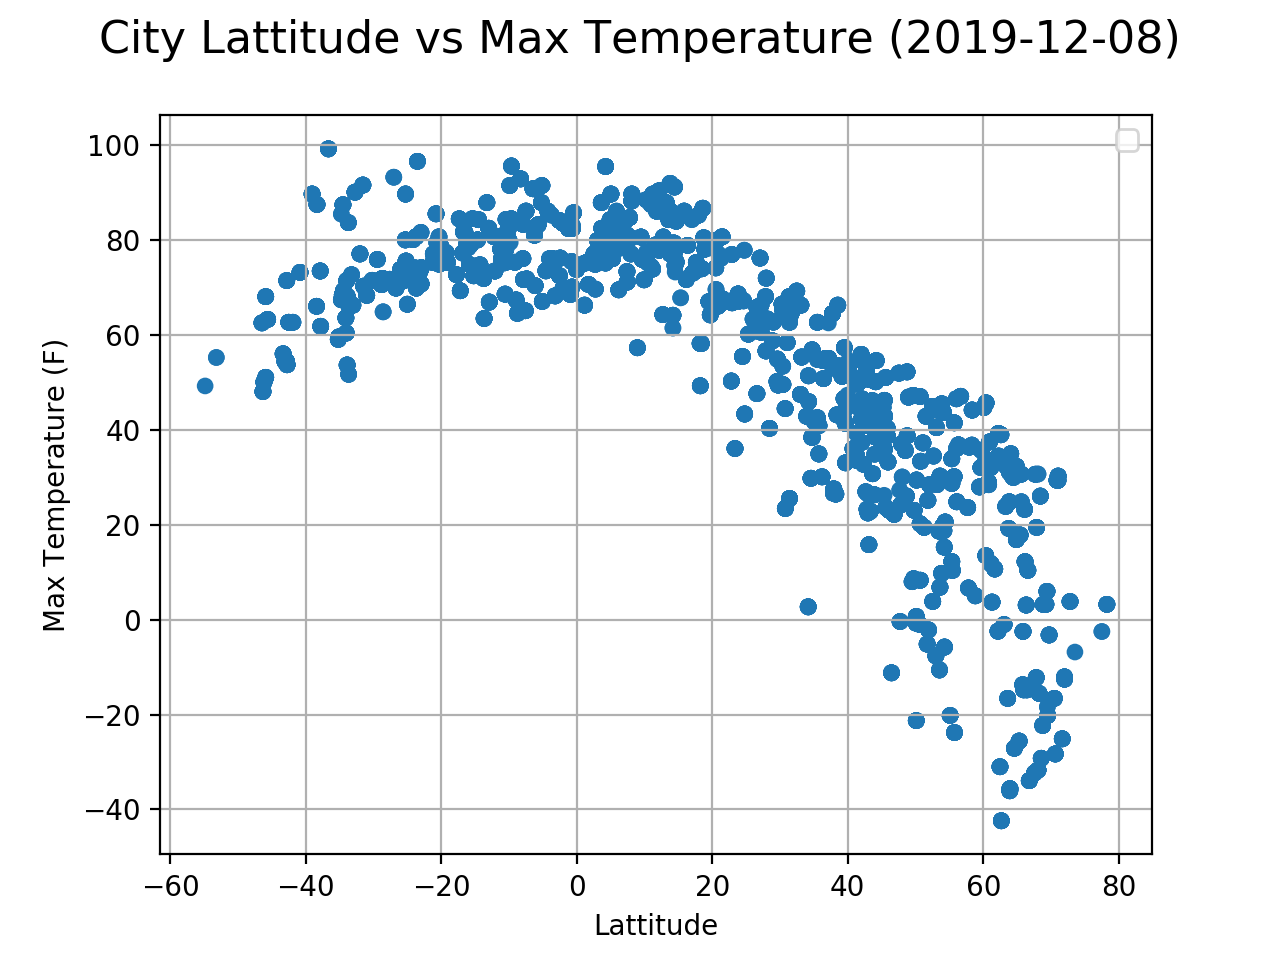

No handles with labels found to put in legend.


In [17]:
fig, ax = plt.subplots()

label = ["Lattitude","Temperature"]

# converting temp from Kelvin to Farenheit (cannot rerun due to weather apikey blocked)
temp= (city_df["Temperature"]-273.15)*9/5+32

ax.scatter(city_df["lattitude"], temp,alpha=1, marker='o',edgecolors='none')

ax.legend()
ax.grid(True)

fig.suptitle("City Lattitude vs Max Temperature ("+today+")", fontsize=16)

ax.set_xlabel("Lattitude")
ax.set_ylabel("Max Temperature (F)")

plt.show()
plt.savefig("LatvsTemp.png")

Observations: 

1. As lattitude increases from negative to "0" temperature increases, lattitude zero is also called equator
2. Lattitude near 80 which is Antartica has -40

#### Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


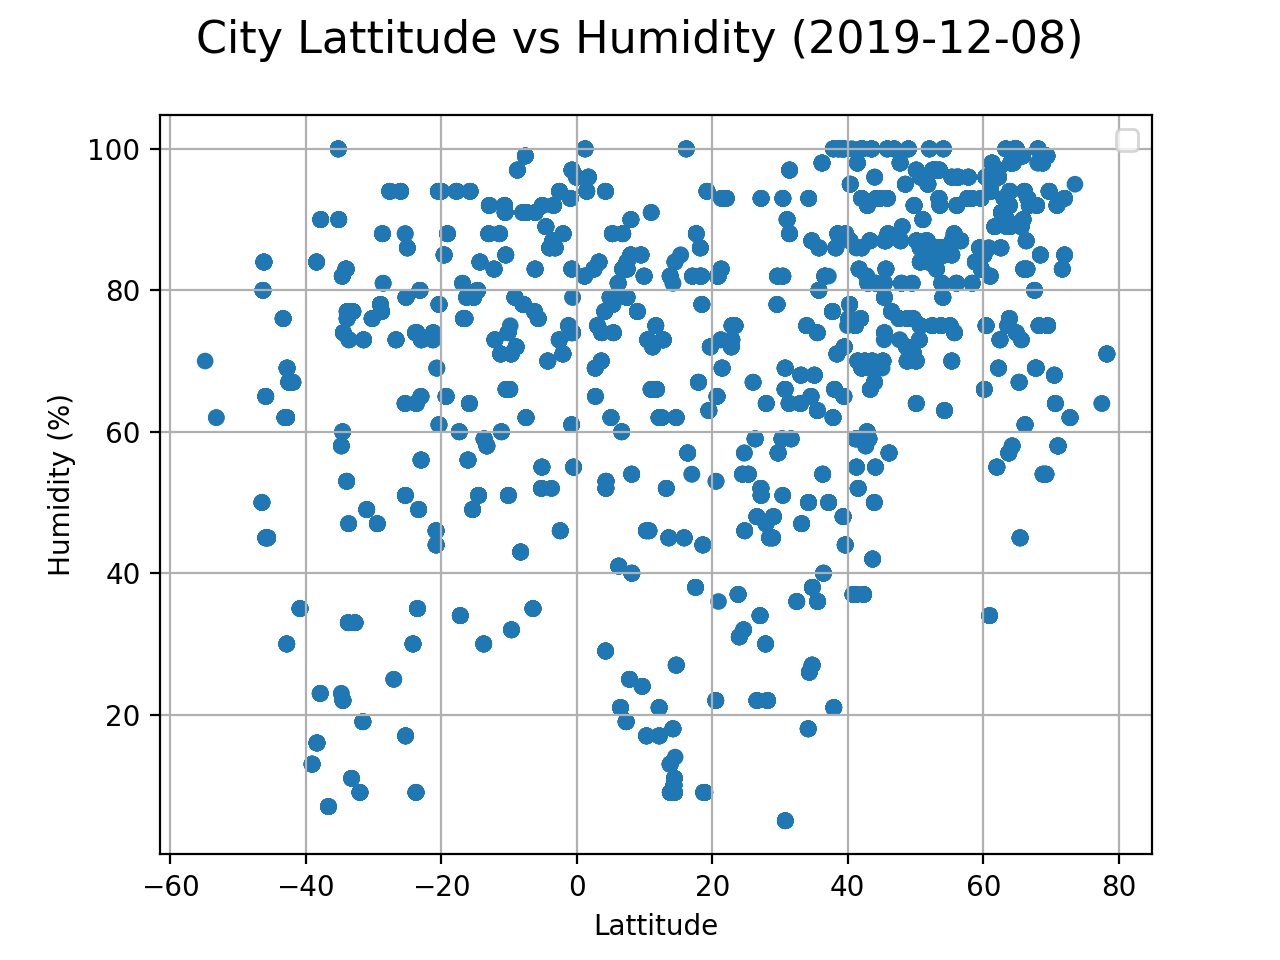

No handles with labels found to put in legend.


In [22]:
fig, ax = plt.subplots()

label = ["Lattitude","Humidity"]

ax.scatter(city_df["lattitude"], city_df["Humidity"],alpha=1, marker='o',edgecolors='none')

ax.legend()
ax.grid(True)

fig.suptitle("City Lattitude vs Humidity ("+today+")", fontsize=16)

ax.set_xlabel("Lattitude")
ax.set_ylabel("Humidity (%)")

plt.show()
plt.savefig("Latvshum.png")

Observations:
    
    1. Humidity is 100% on varied range of lattitude ie, for -40 to 60
    2. Humdidy in increases as Lattitude change to positive scale which is toward 60, we have more concentration of humdity there

#### Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


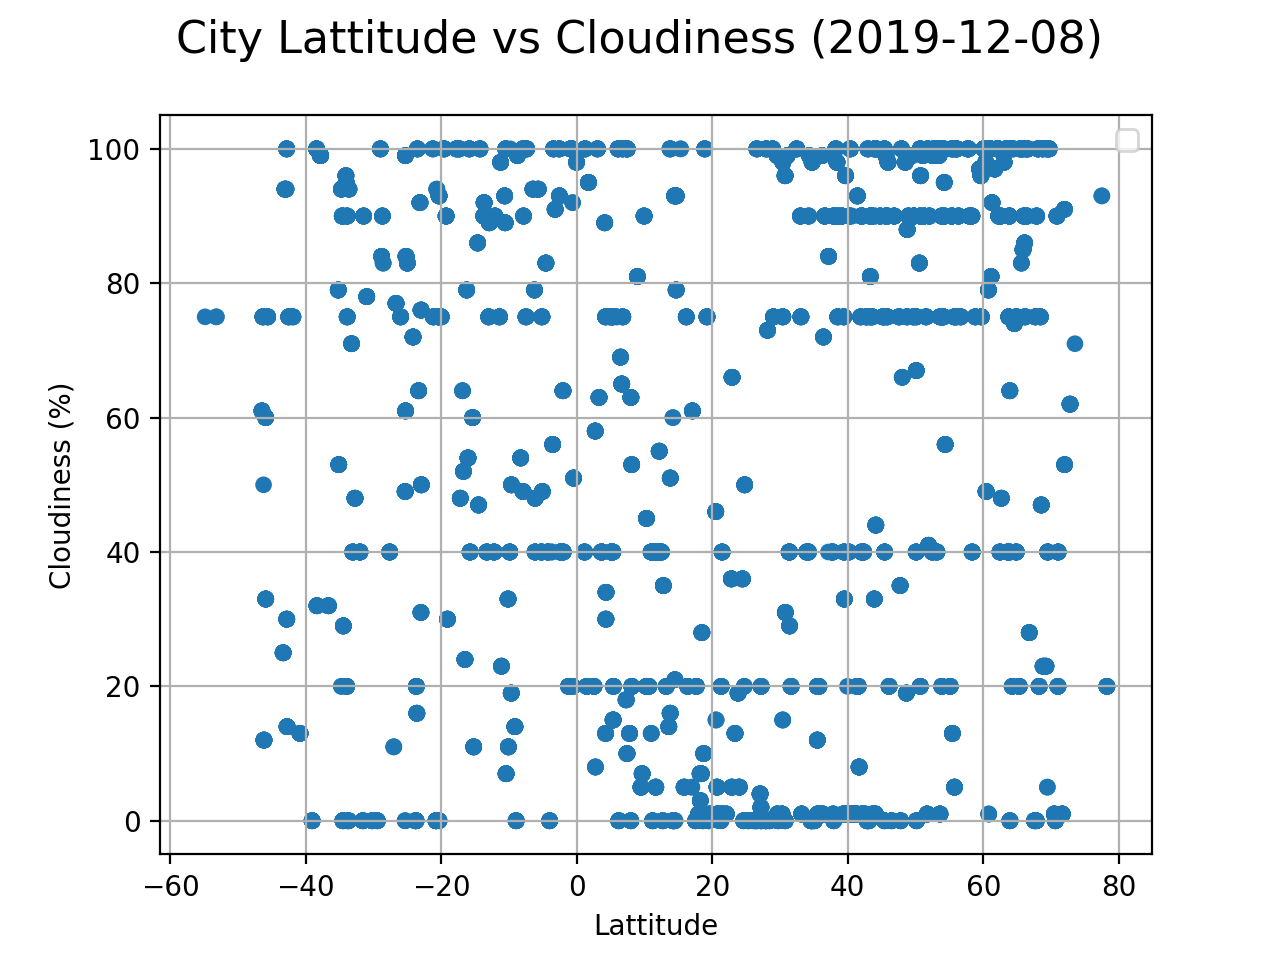

No handles with labels found to put in legend.


In [23]:
fig, ax = plt.subplots()

label = ["Lattitude","Cloudiness"]

ax.scatter(city_df["lattitude"], city_df["Cloudiness"],alpha=1, marker='o',edgecolors='none')

ax.legend()
ax.grid(True)

fig.suptitle("City Lattitude vs Cloudiness ("+today+")", fontsize=16)

ax.set_xlabel("Lattitude")
ax.set_ylabel("Cloudiness (%)")

plt.show()
plt.savefig("Latvscloud.png")

Observations :
    1. Cloudiness is random, we can see 0 and 100% cloudiness on lattitudes varying from -40 towards 80
    2. I don't see much dependency of lattitude on cloudiness

#### Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


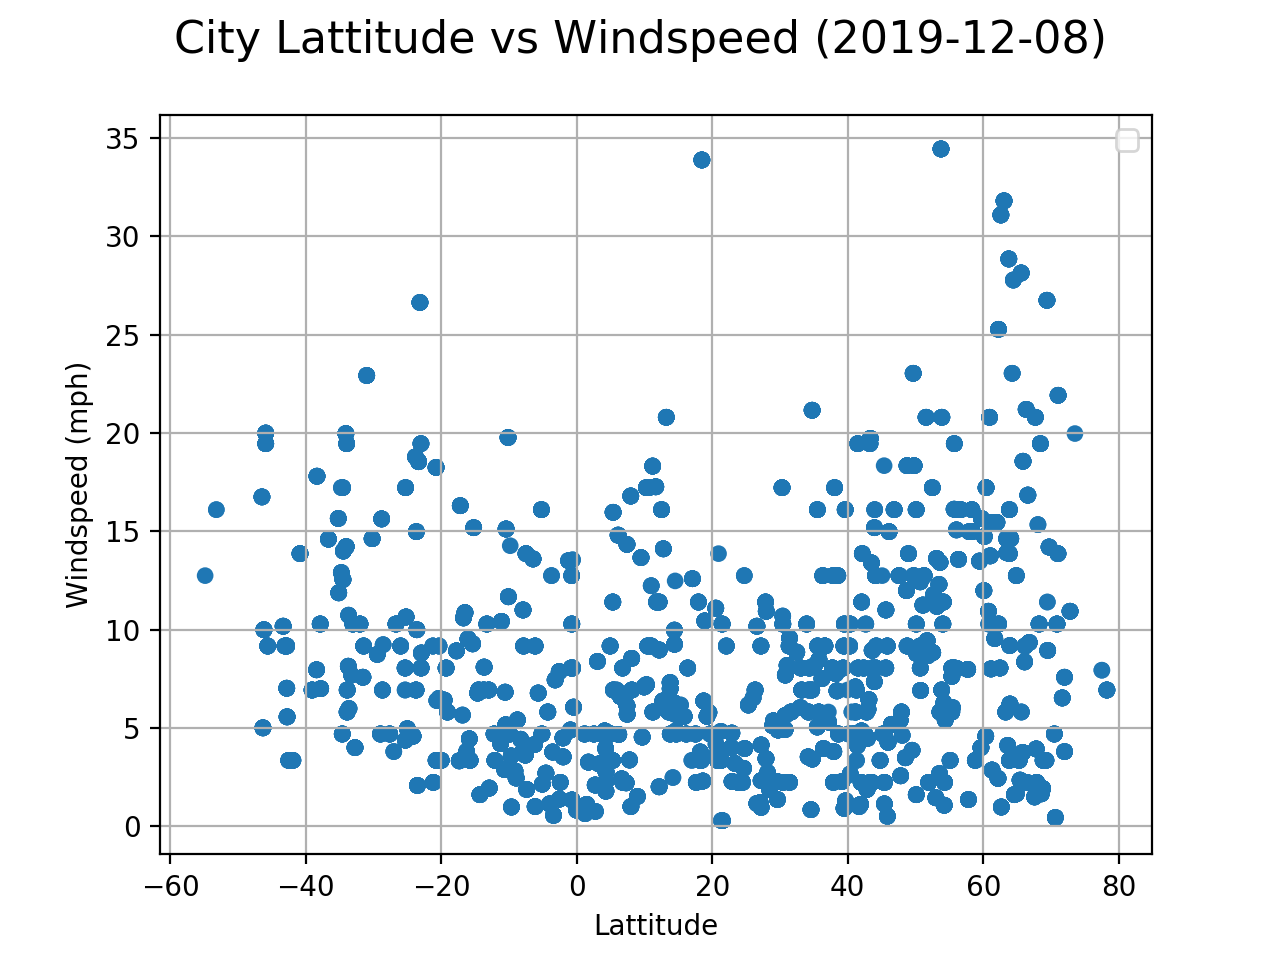

No handles with labels found to put in legend.


In [24]:
fig, ax = plt.subplots()

label = ["Lattitude","Wind Speed"]

# changing from meter per second to miles per hour (Canno rerun with metrics due to API key blocked)
wind_speed= city_df["Windspeed"]*2.237

ax.scatter(city_df["lattitude"], wind_speed,alpha=1, marker='o',edgecolors='none')

ax.legend()
ax.grid(True)

fig.suptitle("City Lattitude vs Windspeed ("+today+")", fontsize=16)

ax.set_xlabel("Lattitude")
ax.set_ylabel("Windspeed (mph)")

plt.show()
plt.savefig("Latvswind.png")

Observations:
1. wind speeed is mostly between 0 and 20 mph. There are some instances where wind speed is more than 30 mph but it is very rare
2. Most of the cities have wind speed concentrated between 0 and 10. 
3. I don't see much dependency of lattitude on windspeed